<a href="https://colab.research.google.com/github/AravindYadav10/Complete-Python-3-Bootcamp/blob/master/BTCfuture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
#Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [165]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving BTC1.csv to BTC1 (1).csv


In [166]:
#Store the data into a data frame
df = pd.read_csv('BTC1.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-02-2015,237.453995,245.957001,224.483002,227.268005,227.268005,40783700.0
1,04-02-2015,227.511002,230.057999,221.113007,226.852997,226.852997,26594300.0
2,05-02-2015,227.664993,239.404999,214.725006,217.110992,217.110992,22516400.0
3,06-02-2015,216.923004,230.509995,216.231995,222.266006,222.266006,24435300.0
4,07-02-2015,222.632996,230.298996,222.606995,227.753998,227.753998,21604200.0
5,08-02-2015,227.692993,229.438004,221.076996,223.412003,223.412003,17145200.0


In [167]:
#Get the number of trading days
df.shape

(2549, 7)

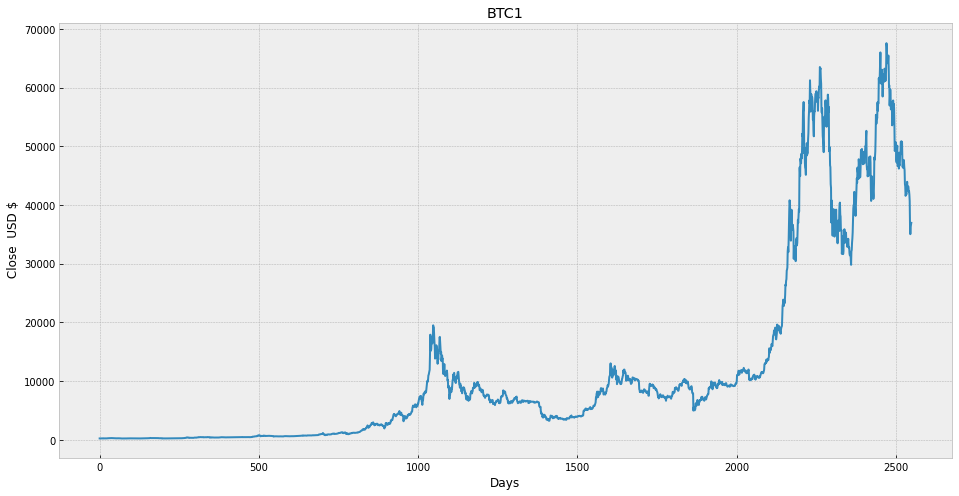

In [168]:
#Visualize the close price
plt.figure(figsize=(16,8))
plt.title('BTC1')
plt.xlabel('Days')
plt.ylabel(' Close  USD $')
plt.plot(df['Close'])
plt.show()

In [169]:
#Get the close price
df = df[['Close']]
df.head(4)

,Close
0,227.268005
1,226.852997
2,217.110992
3,222.266006


In [170]:
#Create a variable to predict 'x' days out into the future
future_days = 365
#Create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(2558)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,Prediction
0,227.268005,369.949005
1,226.852997,389.593994
2,217.110992,386.549011
3,222.266006,376.522003
4,227.753998,376.619995
...,...,...
2544,36457.316410,NaN
2545,35030.250000,NaN
2546,36276.804690,NaN
2547,36654.328130,NaN


In [171]:
#Create the feature data set (X) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[  227.268005]
 [  226.852997]
 [  217.110992]
 ...
 [32067.64258 ]
 [32289.37891 ]
 [32366.39258 ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [172]:
#Create the target data set (y) and convert it to a numpy array and get all the target values except the last 'X' rows
y = np.array(df['Prediction'])[:-future_days]
print(y)

[  369.949005   389.593994   386.549011 ... 36276.80469  36654.32813
 36954.00391 ]


In [173]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [174]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train,y_train)

In [175]:
#Get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


array([[ 8909.819336],
       [ 9358.589844],
       [ 9316.629883],
       [ 9508.993164],
       [ 9350.529297],
       [ 9392.875   ],
       [ 9344.365234],
       [ 9293.521484],
       [ 9180.962891],
       [ 9613.423828],
       [ 9729.801758],
       [ 9795.943359],
       [ 9865.119141],
       [10116.67383 ],
       [ 9856.611328],
       [10208.23633 ],
       [10326.05469 ],
       [10214.37988 ],
       [10312.11621 ],
       [ 9889.424805],
       [ 9934.433594],
       [ 9690.142578],
       [10141.99609 ],
       [ 9633.386719],
       [ 9608.475586],
       [ 9686.441406],
       [ 9663.181641],
       [ 9924.515625],
       [ 9650.174805],
       [ 9341.705078],
       [ 8820.522461],
       [ 8784.494141],
       [ 8672.455078],
       [ 8599.508789],
       [ 8562.454102],
       [ 8869.669922],
       [ 8787.786133],
       [ 8755.246094],
       [ 9078.762695],
       [ 9122.545898],
       [ 8909.954102],
       [ 8108.116211],
       [ 7923.644531],
       [ 79

In [176]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[32569.84961  34269.52344  33466.09766  34316.38672  34269.52344
 33114.35938  14133.70703  35615.87109  37472.08984  55888.13281
 38144.30859  37345.12109  38903.44141  46196.46484   5795.708496
 44918.18359  47909.33203  47504.85156  47105.51563  48717.28906
 47945.05859  49199.87109  52149.00781  51679.79688  55888.13281
 56099.51953  57539.94531  54207.32031  35862.37891  14133.70703
 15701.33984  46339.76172  46188.45313  45137.76953  49631.24219
  3951.599854 50538.24219  55859.79688  37304.69141  48912.38281
 51206.69141  52246.52344   9870.094727 56008.55078  56008.55078
 57332.08984   8550.760742 59302.31641  55907.19922  56804.90234
  6642.109863 57858.92188  57523.42188  58313.64453  57523.42188
 54529.14453  54738.94531  52774.26563  51704.16016  55137.3125
  6317.609863 11392.37891  57750.19922  58917.69141  58917.69141
 59095.80859  59057.87891  57603.89063  59793.23438  59057.87891
 10346.76074  56048.9375   58323.95313  58245.00391  59793.23438
 11450.84668  59893.45313

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


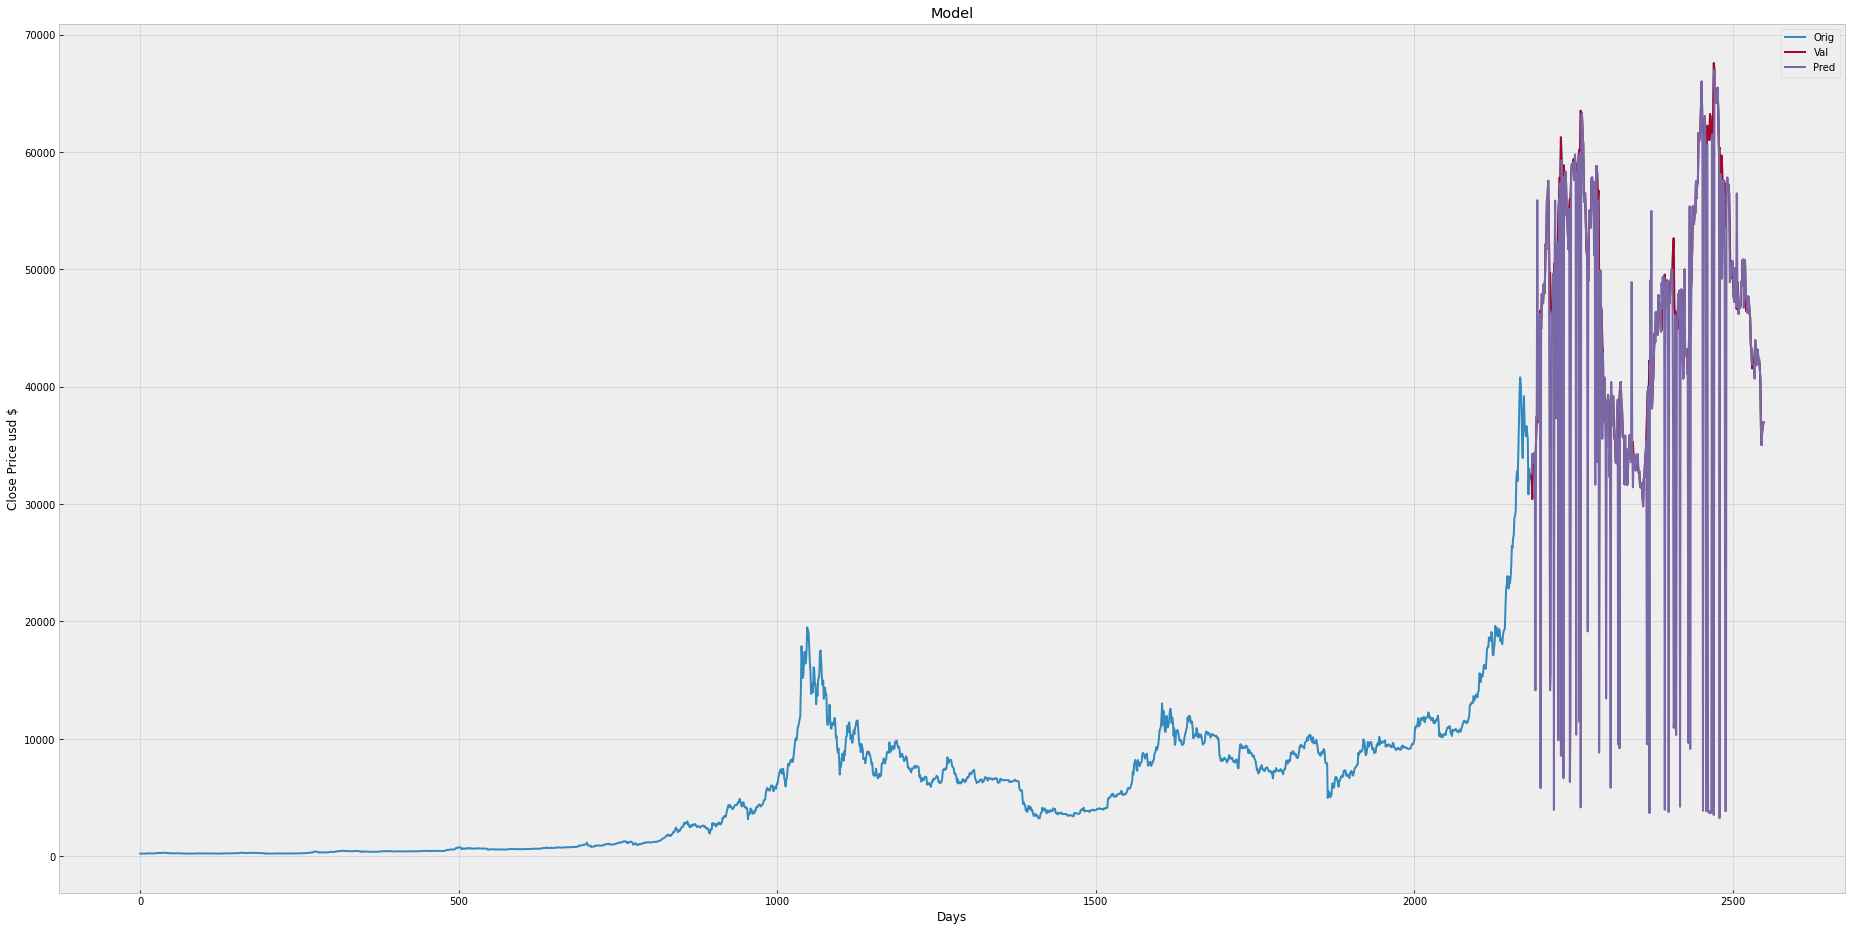

In [177]:
#Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(32,16))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price usd $')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()